# KNN Algorithm for classificationn and regression :

- we will use the Knn algorithm to see if a person is diabetic or not 
- first we need to check the data for any standardisation or filetering (drop etc..)
- split the data into training and test sets
- find the optimal k using cross validation
- predict the best k
- analyse the model with accuracy, confusion matrix, classification report etc..

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [22]:
data = pd.read_csv('/Users/ryanqchiqache/PycharmProjects/Machine-Learning-Learning-Center/learningML/data/diabetes.csv')
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [23]:
# Split the data in X and y so that we can standardize X 

X = data.drop(columns='Outcome', axis=1)
y = data['Outcome']

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)



In [24]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=0)

optimal_knn is :1


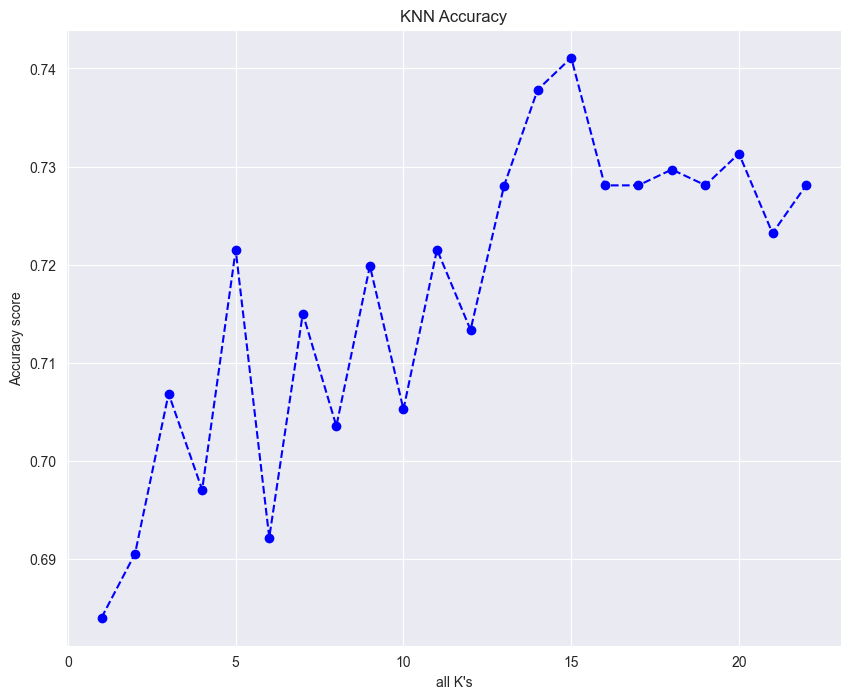

In [25]:
# find the optimale k

cross_score = []

for k in range(1,23):
    knn = KNeighborsClassifier(k)
    cv_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cross_score.append(cv_knn.mean())
    
optimal_k = np.argmin(cross_score) +1 
print(f"optimal_knn is :{optimal_k}")

plt.figure(figsize = (10,8) )
plt.plot(range(1,23), cross_score, marker='o', linestyle='dashed', color='blue' )
plt.title("KNN Accuracy")
plt.xlabel("all K's")
plt.ylabel("Accuracy score")
plt.show()


In [27]:
knn = KNeighborsClassifier(n_neighbors= optimal_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# reports

acurracy = accuracy_score(y_test, y_pred)
classification_repport = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"-------Confision matrix--------")
print(pd.DataFrame(conf_matrix,
                   index=['Actually True', 'Actually False'],
                   columns=['Predicted True', 'Predicted False']))
print(confusion_matrix)
print(acurracy)


-------Confision matrix--------
                Predicted True  Predicted False
Actually True               88               19
Actually False              24               23
<function confusion_matrix at 0x7fb836faa1f0>
0.7207792207792207


In [28]:

def predict(self, person_data):
    person_data_df = pd.DataFrame([person_data], columns=self.dataset.columns[:8])
    person_data_scaled = self.scaler.transform(person_data_df)
    prediction = self.model.predict(person_data_scaled)
    if prediction[0] == 1:
        print("The person is predicted to have diabetes.")
    else:
        print("The person is predicted not to have diabetes.")